In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\aksha\Downloads\Salary_Data (1).csv')

In [3]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
corr=df.corr()
corr

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

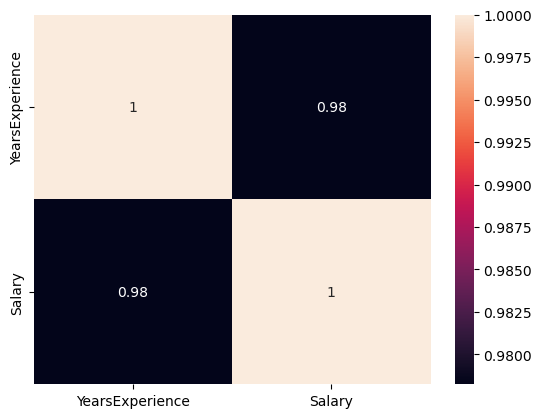

In [7]:
sns.heatmap(corr,annot=True)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

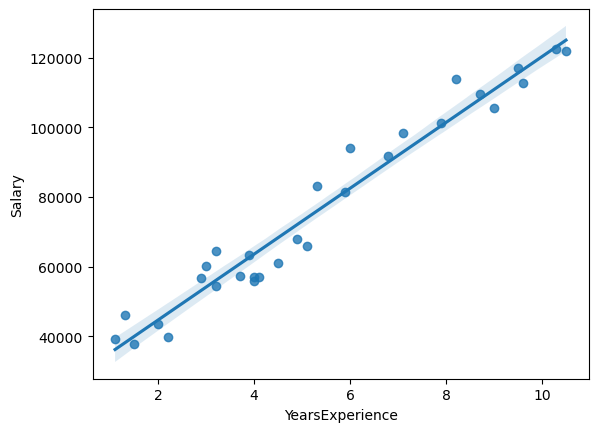

In [8]:
sns.regplot(x=df['YearsExperience'],y=df['Salary'])

<Axes: xlabel='YearsExperience', ylabel='Salary'>

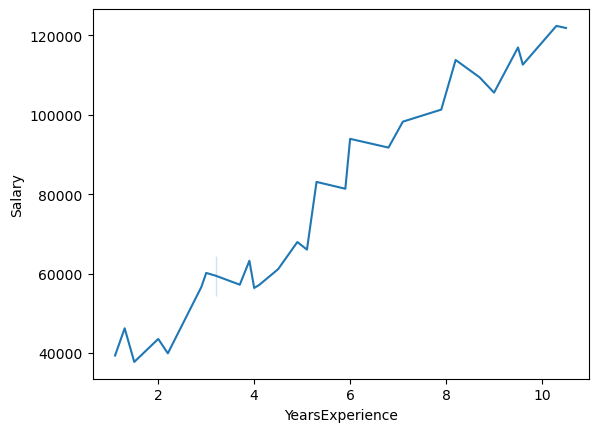

In [9]:
sns.lineplot(data=df,x=df['YearsExperience'],y=df['Salary'])

C:\Users\aksha\AppData\Local\Temp\ipykernel_34404\795404628.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['YearsExperience'])


<Axes: ylabel='Density'>

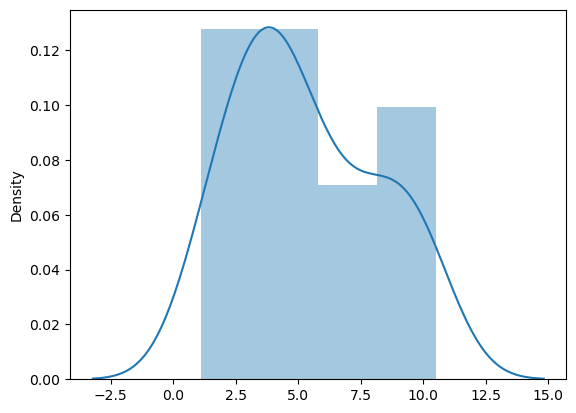

In [10]:
sns.distplot(x=df['YearsExperience'])

C:\Users\aksha\AppData\Local\Temp\ipykernel_34404\369628100.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Salary'])


<Axes: ylabel='Density'>

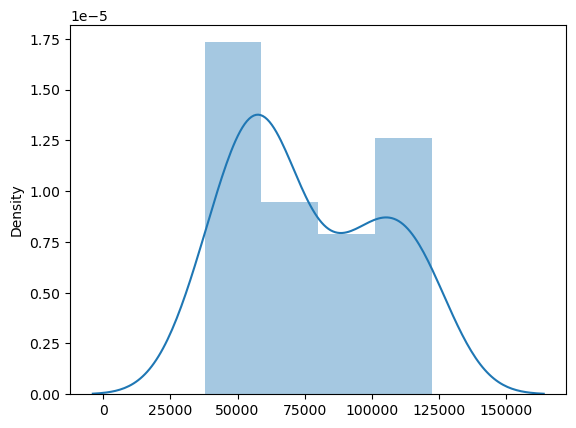

In [11]:
sns.distplot(x=df['Salary'])

### RAW DATA

In [12]:
import statsmodels.formula.api as smf

In [13]:
model=smf.ols('Salary~YearsExperience',data=df).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 06 Jan 2024   Prob (F-statistic):           1.14e-20
Time:                        18:40:36   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model.rsquared

0.9569566641435086

In [16]:
model.rsquared_adj

0.9554194021486339

In [17]:
model.tvalues

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

In [18]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

### manual prediction ,using years of experience as 6.5

In [19]:
#ypredt=mx+c
ypredict= 25792.200199+(9449.962321*6.5)
ypredict

87216.95528550001

### creating a dataframe with YearsExperience

In [20]:
predt_data=pd.Series([5.1,6.2,2.3,1.9])

In [21]:
predt_data_df=pd.DataFrame(predt_data,columns=['YearsExperience'])
predt_data_df

,YearsExperience
0,5.1
1,6.2
2,2.3
3,1.9


In [22]:
prdt_data=model.predict(predt_data_df)
prdt_data

0    73987.008038
1    84381.966592
2    47527.113538
3    43747.128609
dtype: float64

In [23]:
predt_data_df['Predicted_Salary']=prdt_data
predt_data_df

,YearsExperience,Predicted_Salary
0,5.1,73987.008038
1,6.2,84381.966592
2,2.3,47527.113538
3,1.9,43747.128609


<Axes: xlabel='YearsExperience', ylabel='Predicted_Salary'>

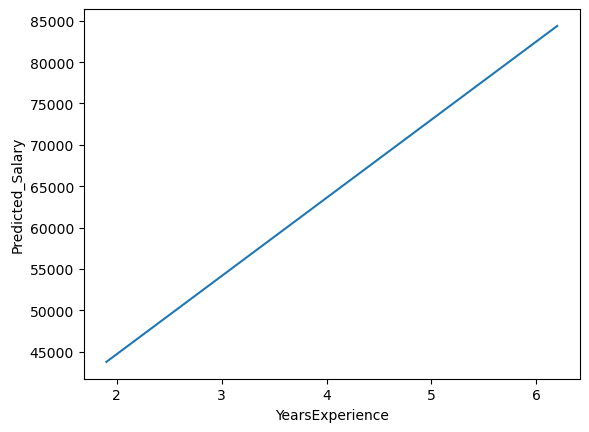

In [24]:
sns.lineplot(x=predt_data_df.YearsExperience,y=predt_data_df.Predicted_Salary)

### USING STANDARDIZATION

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
std=StandardScaler()

In [27]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [28]:
df_std=pd.DataFrame(std.fit_transform(df),columns=df.columns)
df_std

,YearsExperience,Salary
0,-1.510053,-1.360113
1,-1.438373,-1.105527
2,-1.366693,-1.419919
3,-1.187494,-1.204957
4,-1.115814,-1.339781
5,-0.864935,-0.718307
6,-0.829096,-0.588158
7,-0.757416,-0.799817
8,-0.757416,-0.428810
9,-0.578216,-0.698013


<Axes: xlabel='YearsExperience', ylabel='Salary'>

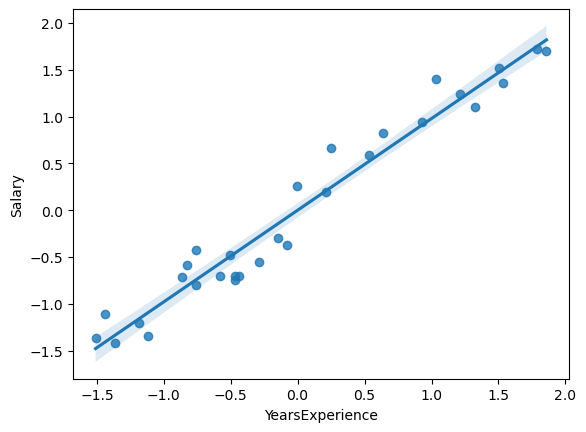

In [29]:
sns.regplot(x=df_std.YearsExperience,y=df_std.Salary)

In [30]:
model_std=smf.ols('Salary~YearsExperience',data=df_std).fit()

In [31]:
model_std.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 06 Jan 2024   Prob (F-statistic):           1.14e-20
Time:                        18:40:58   Log-Likelihood:                 4.6151
No. Observations:                  30   AIC:                            -5.230
Df Residuals:                      28   BIC:                            -2.428
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5.551e-17      0.039  -1.42e-15      1.000      -0.080       0.080
YearsExperience     0.9782      0.039     24.950      0.000       0.898       1.059
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model_std.tvalues

Intercept         -1.415814e-15
YearsExperience    2.495009e+01
dtype: float64

### prediction using manual values

In [33]:
predt_data_1=pd.Series([1.2,1.4,0.8,0.9])

In [34]:
predt_data_df_1=pd.DataFrame(predt_data_1,columns=['YearsExperience'])
predt_data_df_1

,YearsExperience
0,1.2
1,1.4
2,0.8
3,0.9


In [35]:
predt_data_std=model_std.predict(predt_data_df_1)

In [36]:
predt_data_df_1['Salary']=predt_data_std
predt_data_df_1

,YearsExperience,Salary
0,1.2,1.173890
1,1.4,1.369538
2,0.8,0.782593
3,0.9,0.880417


<Axes: xlabel='YearsExperience', ylabel='Salary'>

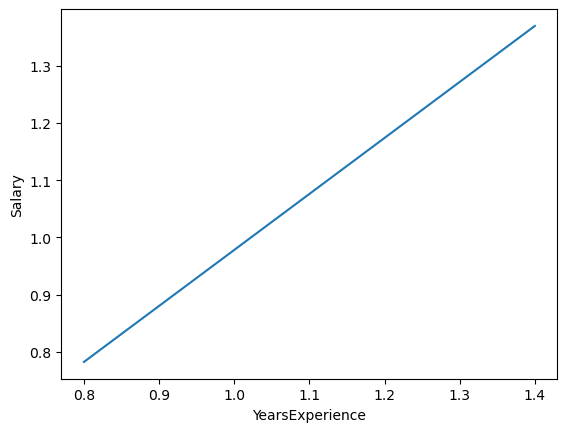

In [37]:
sns.lineplot(x=predt_data_df_1.YearsExperience,y=predt_data_df_1.Salary)

### USING NORMALIZATION

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
min_max=MinMaxScaler()

In [40]:
df_min=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)

In [41]:
df_min

,YearsExperience,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514
5,0.191489,0.223376
6,0.202128,0.264812
7,0.223404,0.197425
8,0.223404,0.315545
9,0.276596,0.229837


<Axes: xlabel='YearsExperience', ylabel='Salary'>

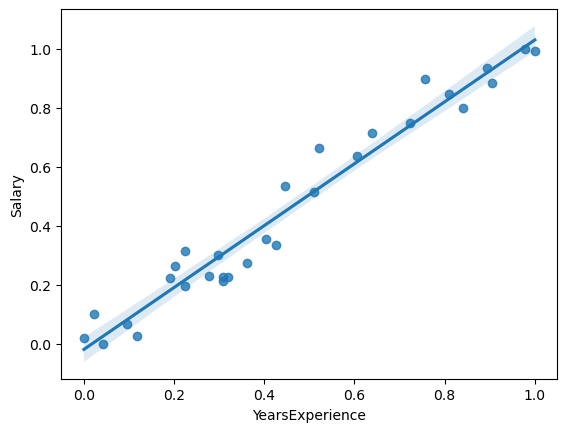

In [42]:
sns.regplot(x='YearsExperience',y='Salary',data=df_min)

In [43]:
model_min=smf.ols('Salary~YearsExperience',data=df_min).fit()

In [44]:
model_min.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 06 Jan 2024   Prob (F-statistic):           1.14e-20
Time:                        18:41:09   Log-Likelihood:                 38.951
No. Observations:                  30   AIC:                            -73.90
Df Residuals:                      28   BIC:                            -71.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0182      0.023     -0.807      0.427      -0.065       0.028
YearsExperience     1.0493      0.042     24.950      0.000       0.963       1.135
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         4.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
model_min.tvalues

Intercept          -0.806598
YearsExperience    24.950094
dtype: float64

In [46]:
predt_data_2=pd.Series([1.2,1.4,0.76,0.45])

In [47]:
predt_data_df_2=pd.DataFrame(predt_data_2,columns=['YearsExperience'])
predt_data_df_2

,YearsExperience
0,1.20
1,1.40
2,0.76
3,0.45


In [48]:
predt_data_min=model_min.predict(predt_data_df_2)

In [49]:
predt_data_df_2['Salary']=predt_data_min

In [50]:
predt_data_df_2

,YearsExperience,Salary
0,1.20,1.240866
1,1.40,1.450717
2,0.76,0.779195
3,0.45,0.453927


### USING LOG TRANSFORMATION ON X AND Y

In [51]:
df_log=pd.DataFrame(np.log(df),columns=df.columns)
df_log

,YearsExperience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906
5,1.064711,10.944506
6,1.098612,11.004597
7,1.163151,10.904946
8,1.163151,11.073567
9,1.308333,10.954117


In [52]:
model_log=smf.ols('Salary~YearsExperience',data=df_log).fit()

In [63]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Sat, 06 Jan 2024   Prob (F-statistic):           7.40e-16
Time:                        18:56:43   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.3280      0.056    184.868      0.000      10.214      10.442
YearsExperience     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
model.tvalues

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

In [55]:
predt_data_2=pd.Series([1.1,1.3,1.5,1.7,1.9,1.86])

In [57]:
predt_data_df_3=pd.DataFrame(predt_data_2,columns=['YearsExperience'])
predt_data_df_3

,YearsExperience
0,1.10
1,1.30
2,1.50
3,1.70
4,1.90
5,1.86


In [59]:
predt_data_log=model_log.predict(predt_data_df_3)

In [60]:
predt_data_df_3['Salary']=predt_data_log

In [61]:
predt_data_df_3

,YearsExperience,Salary
0,1.10,10.946341
1,1.30,11.058759
2,1.50,11.171176
3,1.70,11.283594
4,1.90,11.396012
5,1.86,11.373528


### Sqrt transformation

In [62]:
df_sqrt=pd.DataFrame(np.sqrt(df),columns=df.columns)
df_sqrt

,YearsExperience,Salary
0,1.048809,198.350700
1,1.140175,214.953483
2,1.224745,194.244691
3,1.414214,208.626460
4,1.483240,199.727314
5,1.702939,237.995798
6,1.732051,245.254969
7,1.788854,233.334524
8,1.788854,253.860198
9,1.923538,239.142217


In [64]:
model_sqrt=smf.ols('YearsExperience~Salary',data=df_sqrt).fit()

In [65]:
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Sat, 06 Jan 2024   Prob (F-statistic):           7.58e-19
Time:                        18:57:32   Log-Likelihood:                 14.149
No. Observations:                  30   AIC:                            -24.30
Df Residuals:                      28   BIC:                            -21.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1612      0.161     -7.208      0.000      -1.491      -0.831
Salary         0.0125      0.001     21.315      0.000       0.011       0.014
==============================================================================
Omnibus:                        1.382   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.501   Jarque-Bera (JB):                1.219
Skew:                          -0.461   Prob(JB):                        0.544
Kurtosis:                       2.646   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
predt_data_3=pd.Series([1.1,1.3,1.5,1.7,1.9,1.86])

In [67]:
predt_data_df_4=pd.DataFrame(predt_data_2,columns=['YearsExperience'])
predt_data_df_4

,YearsExperience
0,1.10
1,1.30
2,1.50
3,1.70
4,1.90
5,1.86


In [69]:
predt_data_sqrt=model_log.predict(predt_data_df_3)
predt_data_sqrt

0    10.946341
1    11.058759
2    11.171176
3    11.283594
4    11.396012
5    11.373528
dtype: float64

In [71]:
predt_data_df_4['Salary']=predt_data_sqrt

In [72]:
predt_data_df_4

,YearsExperience,Salary
0,1.10,10.946341
1,1.30,11.058759
2,1.50,11.171176
3,1.70,11.283594
4,1.90,11.396012
5,1.86,11.373528


In [73]:
print('the Rsquared for model with raw data is',model.rsquared)
print('the Rsquared for model with normalized data is',model_min.rsquared)
print('the Rsquared for model with standardized  data is',model_std.rsquared)
print('the Rsquared for model with log transformed data is',model_log.rsquared)
print('the Rsquared for model with sqrt transformed data is',model_sqrt.rsquared)

the Rsquared for model with raw data is 0.9569566641435086
the Rsquared for model with normalized data is 0.9569566641435086
the Rsquared for model with standardized  data is 0.9569566641435086
the Rsquared for model with log transformed data is 0.905215072581715
the Rsquared for model with sqrt transformed data is 0.9419490138976825
